In [2]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
#Reading the data from the csv
ATM = pd.read_csv("Gauteng_ATM-EASE.csv")
ATM.head(5)

,Address,Town/City,Business Type,Color,Municipality,Security,Town Population,Municipality Population
0,"1055 London Road,Tsutsumani,Alexandra",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"
1,"66 Jorrisen Place, Cnr Bertha And Jorrisen Str...",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Unsafe,"910,550.00","5,600,000.00"
2,"23 Jorrrison street,Braamfontein,Johannesburg",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Unsafe,"910,550.00","5,600,000.00"
3,"cnr Biccard and Stiemans Street,Braamfontein,J...",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Unsafe,"910,550.00","5,600,000.00"
4,"Wits University, 1st floor, Matrix Centre, 1 J...",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"


In [51]:
#Droping signup and purchase time
df=ATM.drop(['Security'], axis=1)
ATM

,Address,Town/City,Business Type,Color,Municipality,Security,Town Population,Municipality Population
0,"1055 London Road,Tsutsumani,Alexandra",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"
1,"66 Jorrisen Place, Cnr Bertha And Jorrisen Str...",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Unsafe,"910,550.00","5,600,000.00"
2,"23 Jorrrison street,Braamfontein,Johannesburg",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Unsafe,"910,550.00","5,600,000.00"
3,"cnr Biccard and Stiemans Street,Braamfontein,J...",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Unsafe,"910,550.00","5,600,000.00"
4,"Wits University, 1st floor, Matrix Centre, 1 J...",Johannesburg,Absa,Red,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"
...,...,...,...,...,...,...,...,...
15143,"Adcock Street, Chamdor, Krugersdorp, 1754, Sou...",Krugersdorp,Taxi Rank,Purple,West Rand District Municipality,NaN,"140,643.00","820,995.00"
15144,"Sivewright St, Luipaardsvlei 246 IQ, Krugersdo...",Krugersdorp,Taxi Rank,Purple,West Rand District Municipality,NaN,"140,643.00","820,995.00"
15145,"Sunpiper Street, Rietvallei 241-Iq, Krugersdor...",Krugersdorp,Taxi Rank,Purple,West Rand District Municipality,NaN,"140,643.00","820,995.00"
15146,"Sunpiper Street, Rietvallei 241-Iq, Krugersdor...",Krugersdorp,Taxi Rank,Purple,West Rand District Municipality,NaN,"140,643.00","820,995.00"


In [52]:
ATM.shape

(15148, 8)

In [53]:
ATM.describe()

,Address,Town/City,Business Type,Color,Municipality,Security,Town Population,Municipality Population
count,15148,15148,15148,15147,15148,6892,15147,15148
unique,10207,18,13,13,9,4,24,10
top,CNR BOLANI and KOMA ROADS,Johannesburg,Standard bank,Blue,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"
freq,36,3053,2509,2509,6216,4736,3316,6058


In [54]:
#checking the null values
total = ATM.isnull().sum().sort_values(ascending=False)
percent = (ATM.isnull().sum()/ATM.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Security,8256,0.545022
Color,1,0.000066
Town Population,1,0.000066
Address,0,0.000000
Town/City,0,0.000000
Business Type,0,0.000000
Municipality,0,0.000000
Municipality Population,0,0.000000


In [55]:
ATM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15148 entries, 0 to 15147
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Address                  15148 non-null  object
 1   Town/City                15148 non-null  object
 2   Business Type            15148 non-null  object
 3   Color                    15147 non-null  object
 4   Municipality             15148 non-null  object
 5   Security                 6892 non-null   object
 6   Town Population          15147 non-null  object
 7   Municipality Population  15148 non-null  object
dtypes: object(8)
memory usage: 946.9+ KB


In [23]:
ATM.dtypes

Address                    object
Town/City                  object
Business Type              object
Color                      object
Municipality               object
Security                   object
Town Population            object
Municipality Population    object
dtype: object

In [24]:
ATM.duplicated().sum()

4174

In [58]:
ATM["Business Type"].value_counts()

Standard bank    2509
FNB              1641
Shopping         1548
Resturant        1488
Beauty           1313
Absa             1252
Gas Station      1245
Capitec           994
Internet Cafe     772
Education         663
Taxi Rank         625
Stadiums          599
Nedbank           499
Name: Business Type, dtype: int64

In [56]:
ATM["Town/City"].value_counts()

Johannesburg      3053
Pretoria          2236
Benoni            2097
Soweto            1347
Midrand            887
Roodepoort         826
Centurion          796
Vereeniging        555
Vanderbijlpark     544
Springs            528
Carletonville      500
Krugersdorp        474
Boksburg           447
Brakpan            407
Westonaria         251
Diepsloot          194
Krugerdorp           5
Sandton              1
Name: Town/City, dtype: int64

In [57]:
ATM["Municipality"].value_counts()

City of Johannesburg Metropolitan Municipality    6216
Ekurhuleni Metropolitan Municipality              3477
City of Tshwane Metropolitan Municipality         3229
Emfuleni Local Municipality                       1100
Merafong City Local Municipality                   499
West Rand District Municipality                    376
Westonaria Local Municipality                      249
Midvaal Local Municipality                           1
Randfontein Local Municipality                       1
Name: Municipality, dtype: int64

In [33]:

# Business Type Distribution
business_type_counts = ATM['Business Type'].value_counts()
print(business_type_counts)

Standard bank    2509
FNB              1641
Shopping         1548
Resturant        1488
Beauty           1313
Absa             1252
Gas Station      1245
Capitec           994
Internet Cafe     772
Education         663
Taxi Rank         625
Stadiums          599
Nedbank           499
Name: Business Type, dtype: int64


In [59]:
# Business Type Popularity
business_type_popularity = ATM.groupby('Business Type').sum()['Town Population']
print(business_type_popularity)

Business Type
Absa             910,550.00910,550.00910,550.00910,550.00910,55...
Beauty           140,000.00140,000.00140,000.00140,000.00140,00...
Capitec          910,550.00910,550.00910,550.00910,550.00910,55...
Education        910,550.00910,550.00910,550.00910,550.00910,55...
FNB              140,000.00140,000.00140,000.00140,000.00140,00...
Gas Station      910,550.00910,550.00910,550.00910,550.00910,55...
Internet Cafe    910,550.00910,550.00910,550.00910,550.00910,55...
Nedbank          140,000.00140,000.00140,000.00140,000.00140,00...
Resturant        140,000.00140,000.00140,000.00140,000.00140,00...
Shopping         140,000.00140,000.00140,000.00140,000.00140,00...
Stadiums         910,550.00910,550.00910,550.00910,550.00910,55...
Standard bank    140,000.00140,000.00140,000.00140,000.00140,00...
Taxi Rank        910,550.00910,550.00910,550.00910,550.00910,55...
Name: Town Population, dtype: object


In [ ]:

# Business Type Color Coding
color_mapping = {
    'Type 1': 'red',
    'Type 2': 'pink',
    'Type 3': 'grey',
    'Type 4': 'Orange',
    'Type 5': 'yellow',
    'Type 6': 'peach',
    'Type 7': 'brown',
    'Type 8': 'green',
    'Type 9': 'Gold',
    'Type 10': 'white',
    'Type 11': 'black',
    'Type 12': 'blue',
    'Type 13':'purple'
}

colors = ATM['Business Type'].map(color_mapping)
plt.scatter(ATM['Town/City'], ATM['Municipality'], c=colors)
plt.show()
# Create a scatter plot using the 'c' parameter

plt.title('Business Type Color Coding')
plt.xlabel('Town')
plt.ylabel('Municipality')
plt.show()

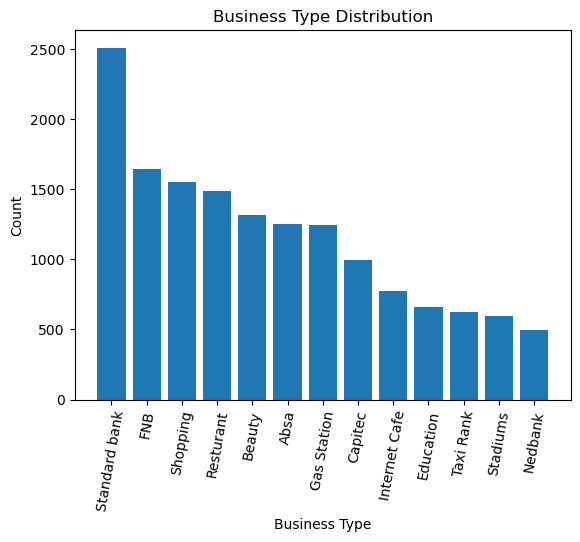

In [76]:
# Business Type Distribution Bar Chart
business_type_counts = ATM['Business Type'].value_counts()
plt.bar(business_type_counts.index, business_type_counts.values)
plt.title('Business Type Distribution')
plt.xlabel('Business Type')
plt.ylabel('Count')


# Rotate x-labels by 45 degrees
plt.xticks(rotation=80)
plt.show()

In [ ]:
# ATM Availability Pie Chart
atm_counts = ATM['ATMS'].value_counts()
plt.pie(atm_counts.values, labels=atm_counts.index)
plt.title('ATM Availability')
plt.show()

In [ ]:
from PIL import Image


# Load image file using PIL
img = Image.open('/Users/damac20/Downloads/Gauteng_ATM-EASE_data.csv')

# Resize image
img = img.resize((1024, 768))

# Plot image using matplotlib
plt.imshow(img)
plt.show()







# Business Type Popularity Horizontal Bar Chart
business_type_popularity = ATM.groupby('Business Type').sum()['Town Population']
business_type_popularity = business_type_popularity.sort_values(ascending=False)
plt.barh(business_type_popularity.index, business_type_popularity.values)
plt.title('Business Type Popularity')
plt.xlabel('Population')
plt.ylabel('Business Type')
plt.show()

In [64]:
ATM.describe()

,Address,Town/City,Business Type,Color,Municipality,Security,Town Population,Municipality Population
count,15148,15148,15148,15147,15148,6892,15147,15148
unique,10207,18,13,13,9,4,24,10
top,CNR BOLANI and KOMA ROADS,Johannesburg,Standard bank,Blue,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"
freq,36,3053,2509,2509,6216,4736,3316,6058


In [ ]:
# Population by Town/Municipality Bar Chart
town_population = ATM.groupby('Town/City')['Town Population'].sum()
municipality_population = ATM.groupby('Municipality')['Municipality Population'].sum()
plt.bar(town_population.index, town_population.values, label=' Population per Town')
plt.bar(municipality_population.index, municipality_population.values, label='Municipality Population')
plt.title('Population by Town/Municipality')
plt.xlabel('Location')
plt.ylabel('Population')
plt.legend()
plt.show()

In [ ]:

# Population Density Vertical Bar Chart
population_density = ATM.groupby('Municipality').sum()['Municipality Population'] / ATM['Municipality'].nunique()
population_density = population_density.sort_values(ascending=False)
plt.bar(population_density.index, population_density.values)
plt.title('Population Density')
plt.xlabel('Municipality')
plt.ylabel('Population Density')
plt.xticks(rotation=90)
plt.show()

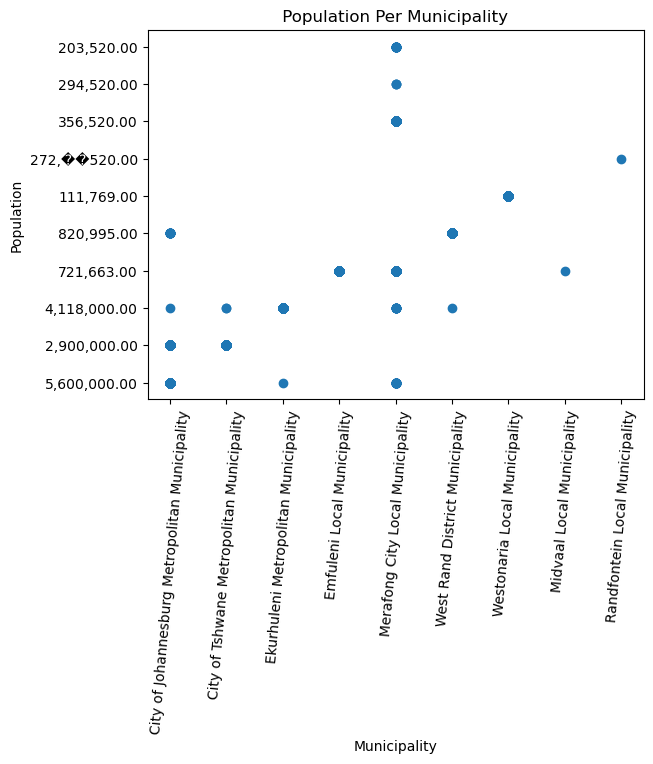

In [78]:
# Municipality Population Scatter Plot
plt.scatter(ATM['Municipality'], ATM['Municipality Population'])
plt.title(' Population Per Municipality ')
plt.xlabel('Municipality')
plt.ylabel('Population')
plt.xticks(rotation=85)
plt.show()

In [ ]:
# Population Distribution Box Plot
plt.boxplot([ATM['Town Population'], ATM['Municipality Population']])
plt.title('Population Distribution')
plt.xticks([1, 2], ['Town', 'Municipality'])
plt.ylabel('Population')
plt.show()

In [9]:
ATM.isnull().sum()

Address                       0
Town/City                     0
Business Type                 0
Color                         1
Municipality                  0
Security                   8256
Town Population               1
Municipality Population       0
dtype: int64

In [10]:
ATM.describe()

,Address,Town/City,Business Type,Color,Municipality,Security,Town Population,Municipality Population
count,15148,15148,15148,15147,15148,6892,15147,15148
unique,10207,18,13,13,9,4,24,10
top,CNR BOLANI and KOMA ROADS,Johannesburg,Standard bank,Blue,City of Johannesburg Metropolitan Municipality,Safe,"910,550.00","5,600,000.00"
freq,36,3053,2509,2509,6216,4736,3316,6058


In [11]:
ATM.dtypes

Address                    object
Town/City                  object
Business Type              object
Color                      object
Municipality               object
Security                   object
Town Population            object
Municipality Population    object
dtype: object

In [12]:
# remove commas and decimal points from 'Town Population' column
ATM['Town Population'] = ATM['Town Population'].str.replace(',', '').str.replace('.', '')
ATM['Municipality Population'] = ATM['Municipality Population'].str.replace(',', '').str.replace('.', '')

In [13]:
# replace missing values with 0
ATM['Town Population'] = ATM['Town Population'].fillna(0)

ATM['Municipality Population'] = ATM['Municipality Population'].fillna(0)

In [14]:
# drop rows with NaN values
ATM.dropna(subset=['Town Population'], inplace=True)

ATM.dropna(subset=['Municipality Population'], inplace=True)

In [15]:

# remove whitespace from the 'Town Population' column
ATM['Town Population'] = ATM['Town Population'].str.replace('181��411', '181411')
# ATM_EASE_DATA['Municipality Population'] = ATM_EASE_DATA['Municipality Population'].str.replace('NaN', '0')

In [16]:
print(ATM['Town Population'].unique())


['91055000' '18141100' '32641600' '189592100' '23658000' '74165100'
 '15877700' '26032100' '7308000' '12161000' '9584000' '49773100' '2300000'
 '14064300' '1025900' '14000000' nan '181411' '22241500' '289592100'
 '389592100' '489592100' '589592100' '50873100' '18241100']


In [17]:
print(ATM['Municipality Population'].unique())

['560000000' '290000000' '411800000' '72166300' '82099500' '11176900'
 '272��52000' '35652000' '29452000' '20352000']


In [19]:
ATM['Town Population'] = pd.to_numeric(ATM['Town Population'], errors='coerce')
ATM = ATM.dropna(subset=['Town Population'])
ATM['Municipality Population'] = pd.to_numeric(ATM['Municipality Population'], errors='coerce')
ATM = ATM.dropna(subset=['Municipality Population'])

In [20]:
ATM.dtypes

Address                     object
Town/City                   object
Business Type               object
Color                       object
Municipality                object
Security                    object
Town Population            float64
Municipality Population    float64
dtype: object

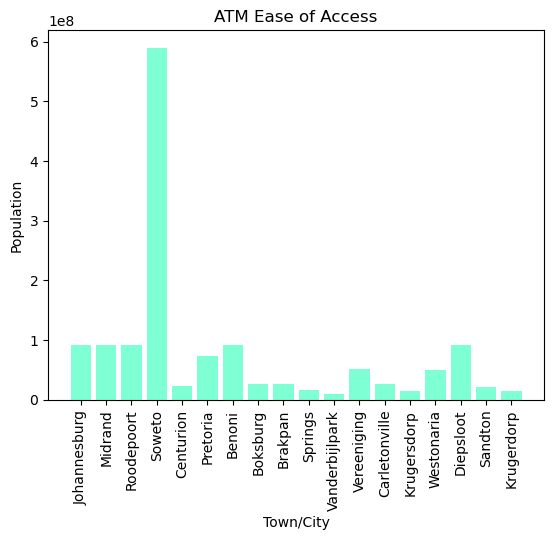

In [21]:
# Create the bar chart
plt.bar(ATM['Town/City'], ATM['Town Population'], color='Aquamarine')

# Add labels and title
plt.xlabel('Town/City')
plt.ylabel('Population')
plt.title('ATM Ease of Access')
plt.xticks(rotation=90)
# Show the plot
plt.show()

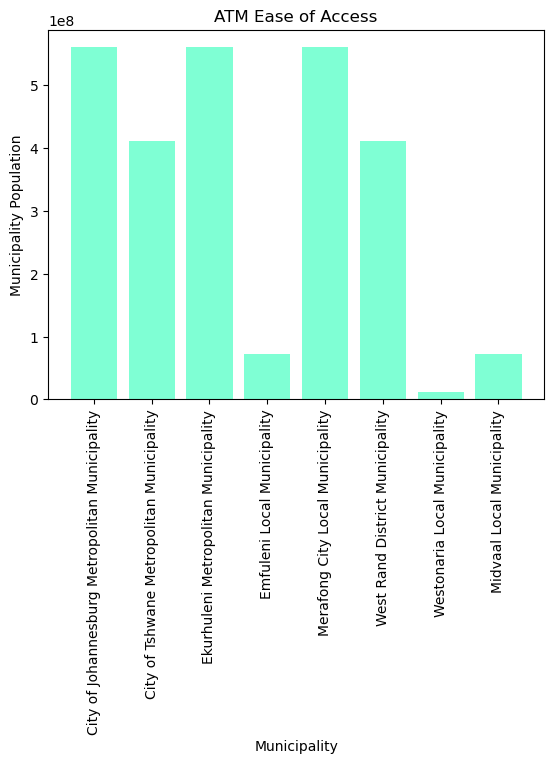

In [22]:
# Create the bar chart
plt.bar(ATM['Municipality'], ATM['Municipality Population'], color='Aquamarine')

# Add labels and title
plt.xlabel('Municipality')
plt.ylabel('Municipality Population')
plt.title('ATM Ease of Access')
plt.xticks(rotation=90)
# Show the plot
plt.show()

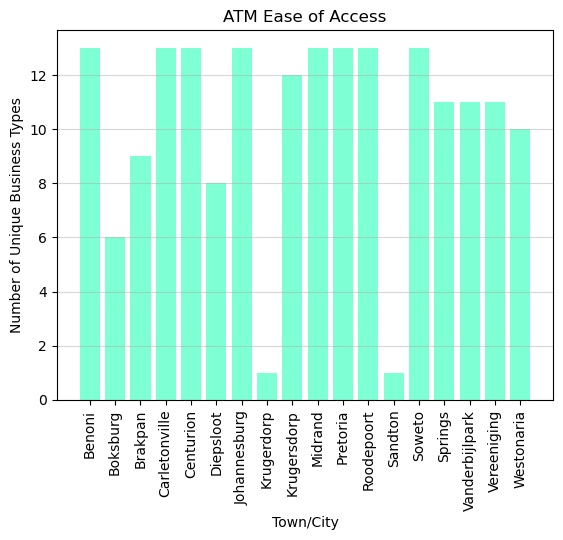

In [23]:
# Group the data by town/city and count the unique business types
counts = ATM.groupby('Town/City')['Business Type'].nunique().reset_index(name='Count')

# Create the bar chart
plt.bar(counts['Town/City'], counts['Count'], color='Aquamarine')

# Add labels and title
plt.xlabel('Town/City')
plt.ylabel('Number of Unique Business Types')
plt.title('ATM Ease of Access')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a grid
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()

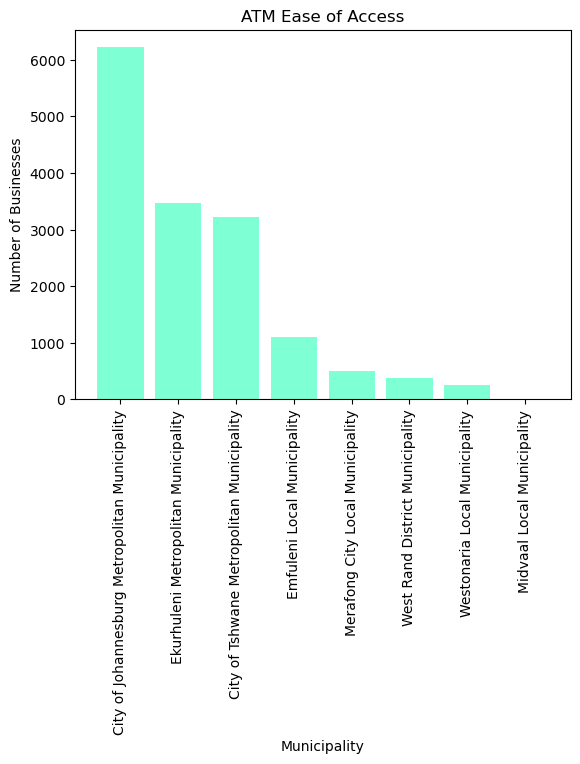

In [24]:
# Count the number of businesses for each municipality
counts = ATM['Municipality'].value_counts()

# Create the bar chart
plt.bar(counts.index, counts.values, color='Aquamarine')

# Add labels and title
plt.xlabel('Municipality')
plt.ylabel('Number of Businesses')
plt.title('ATM Ease of Access')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


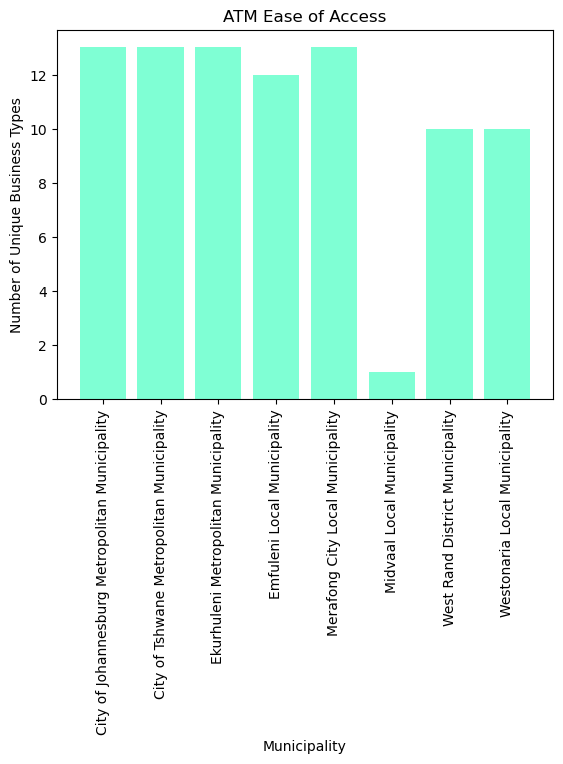

In [25]:
# Group the data by municipality and count the unique business types
counts = ATM.groupby('Municipality')['Business Type'].nunique()

# Create the bar chart
plt.bar(counts.index, counts.values, color='Aquamarine')

# Add labels and title
plt.xlabel('Municipality')
plt.ylabel('Number of Unique Business Types')
plt.title('ATM Ease of Access')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


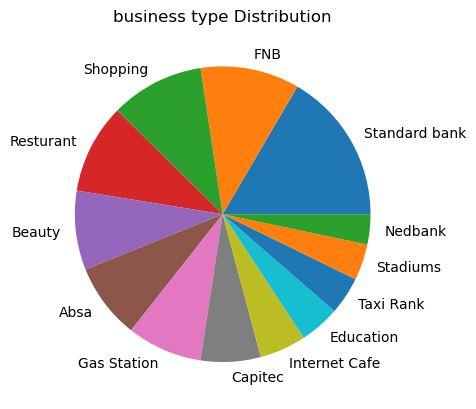

In [26]:
# business Availability Pie Chart
atm_counts = ATM['Business Type'].value_counts()
plt.pie(atm_counts.values, labels=atm_counts.index)
plt.title('business type Distribution')
plt.show()